# 🔁 Predicción del oscilador armónico amortiguado con una RNN simple

En este notebook modelamos el comportamiento de un oscilador armónico amortiguado usando una red neuronal recurrente simple (RNN). El objetivo es que la red aprenda a predecir el siguiente valor de la señal a partir de una secuencia pasada.

In [1]:
# Paso 1: Generación de datos analíticos del oscilador amortiguado
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Parámetros del oscilador
A = 1.0
zeta = 0.1
omega = 2 * np.pi  # frecuencia natural
phi = 0.0
t = np.linspace(0, 10, 1000)

# Solución analítica del oscilador amortiguado
def generar_oscilador_amortiguado(A, zeta, omega, phi, t):
    omega_d = omega * np.sqrt(1 - zeta**2)
    return A * np.exp(-zeta * omega * t) * np.cos(omega_d * t + phi)

x = generar_oscilador_amortiguado(A, zeta, omega, phi, t)

## 📊 Visualización de la señal
La señal obtenida muestra oscilaciones cuyo valor decrece con el tiempo debido a la amortiguación.

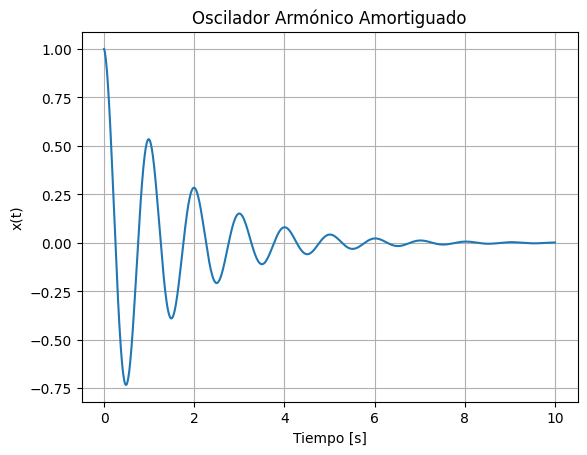

In [2]:
plt.plot(t, x)
plt.title("Oscilador Armónico Amortiguado")
plt.xlabel("Tiempo [s]")
plt.ylabel("x(t)")
plt.grid()
plt.show()

## ⚙️ Paso 2: Normalización y creación de secuencias

Normalizamos la señal para que esté en el rango [0, 1] y preparamos los datos en forma de secuencias para que puedan ser utilizadas por la RNN.


In [3]:
x = x.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

def crear_secuencias(data, paso):
    X, y = [], []
    for i in range(len(data) - paso):
        X.append(data[i:i+paso])
        y.append(data[i+paso])
    return np.array(X), np.array(y)

paso = 50
X, y = crear_secuencias(x_scaled, paso)

## 🧠 Paso 3: Construcción del modelo RNN simple

Usamos una capa `SimpleRNN` con 50 unidades seguida de una capa `Dense` que predice un valor escalar.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(paso, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

## 🏋️ Paso 4: Entrenamiento del modelo

Entrenamos el modelo con las secuencias de entrada para predecir el valor siguiente de la señal.

In [5]:
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0207
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2026e-04
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2235e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.5854e-05
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8311e-05
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0851e-05
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.5559e-05
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3854e-05
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9208e-05
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0198e-05
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3628e-05
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4345e-05
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.1292e-06
Epoch 15/50
30/30 ━━━━━━━━━━━━

## 🔮 Paso 5: Predicción y desescalado

Usamos el modelo entrenado para hacer predicciones y las comparamos con la señal original.

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


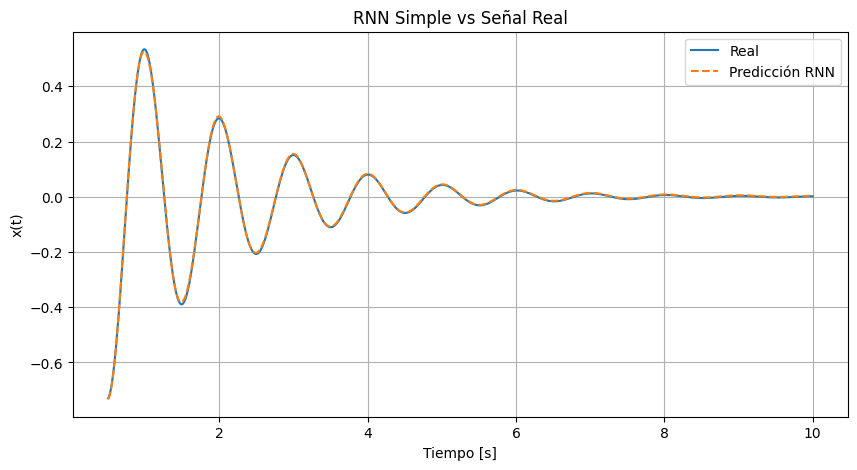

In [6]:
x_pred = model.predict(X)
x_pred_inv = scaler.inverse_transform(x_pred)
y_real_inv = scaler.inverse_transform(y)

plt.figure(figsize=(10,5))
plt.plot(t[paso:], y_real_inv, label='Real')
plt.plot(t[paso:], x_pred_inv, label='Predicción RNN', linestyle='--')
plt.xlabel("Tiempo [s]")
plt.ylabel("x(t)")
plt.title("RNN Simple vs Señal Real")
plt.legend()
plt.grid(True)
plt.show()

#LSTM

# 🔁🔁 Predicción del oscilador armónico amortiguado con LSTM

Aquí reemplazamos la capa `SimpleRNN` por una `LSTM` para mejorar la capacidad del modelo de aprender dependencias a largo plazo.

In [7]:
# Volvemos a usar los mismos datos
X, y = crear_secuencias(x_scaled, paso)

## 🧠 Paso 3: Construcción del modelo LSTM

Las LSTM permiten que el modelo recuerde patrones más complejos y duraderos, gracias a su arquitectura de puertas de entrada, olvido y salida.

In [8]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='tanh', input_shape=(paso, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

## 🏋️ Paso 4: Entrenamiento del modelo LSTM

Entrenamos el modelo de forma similar al anterior.

In [9]:
model_lstm.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0884
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0030
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0017
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0015
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.7188e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.0826e-04
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.1791e-05
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.8454e-05
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.7912e-05
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.7140e-05
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.3501e-05
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0679e-05
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.4828e-05
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.5041e-05
Epoch 15/50
30/30 ━━━━━━━━━━━━━

## 🔮 Paso 5: Predicción y visualización con LSTM

Se observa una mejor capacidad de seguimiento del patrón de la señal gracias a la memoria extendida de la LSTM.

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


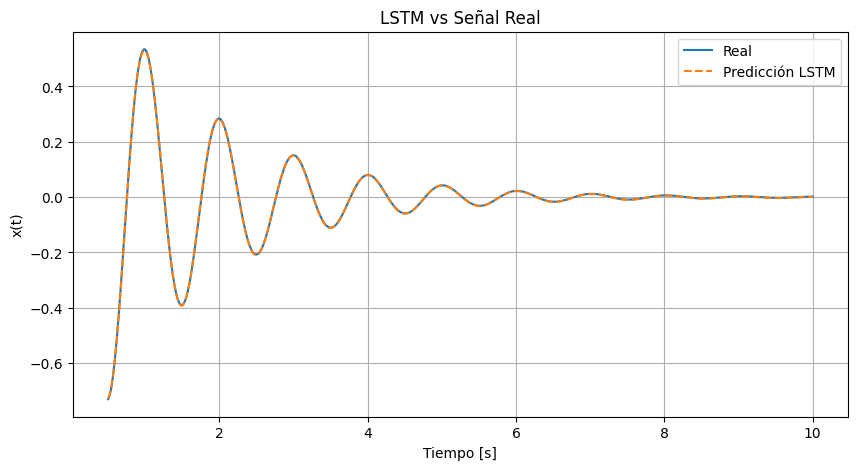

In [10]:
x_pred_lstm = model_lstm.predict(X)
x_pred_lstm_inv = scaler.inverse_transform(x_pred_lstm)

plt.figure(figsize=(10,5))
plt.plot(t[paso:], y_real_inv, label='Real')
plt.plot(t[paso:], x_pred_lstm_inv, label='Predicción LSTM', linestyle='--')
plt.xlabel("Tiempo [s]")
plt.ylabel("x(t)")
plt.title("LSTM vs Señal Real")
plt.legend()
plt.grid(True)
plt.show()

#Predicción de Textos

# Predicción de texto con LSTM – Generación letra por letra

Entrenemos una red neuronal LSTM para predecir el siguiente carácter en una secuencia de texto. Este es un ejemplo básico pero poderoso del uso de redes neuronales recurrentes para tareas de generación de lenguaje.

El enfoque es simple:
1. Tomamos una cadena de texto.
2. La convertimos en una secuencia de caracteres con codificación numérica.
3. Entrenamos una LSTM para predecir el próximo carácter.
4. Usamos el modelo entrenado para generar nuevo texto carácter por carácter.


In [11]:
# Paso 1: Preparar el texto y el conjunto de caracteres
text = "la física es la ciencia fundamental que describe la naturaleza del universo."

# Convertimos el texto a minúsculas y extraemos el vocabulario
chars = sorted(list(set(text)))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for c, i in char_to_idx.items()}
vocab_size = len(chars)

print(f"Vocabulario ({vocab_size} caracteres): {chars}")


Vocabulario (21 caracteres): [' ', '.', 'a', 'b', 'c', 'd', 'e', 'f', 'i', 'l', 'm', 'n', 'o', 'q', 'r', 's', 't', 'u', 'v', 'z', 'í']


## Paso 2: Crear las secuencias de entrenamiento

Dividimos el texto en pares (entrada, salida), donde la entrada es una secuencia de N caracteres y la salida es el siguiente carácter.


In [12]:
seq_length = 20
step = 1

X_data = []
y_data = []

for i in range(0, len(text) - seq_length, step):
    X_seq = text[i:i+seq_length]
    y_char = text[i+seq_length]
    X_data.append([char_to_idx[c] for c in X_seq])
    y_data.append(char_to_idx[y_char])

print(f"Total de secuencias: {len(X_data)}")

Total de secuencias: 56


##Paso 3: Codificación y redimensionamiento

Convertimos las secuencias a formato one-hot para alimentar la red LSTM.


In [13]:
import numpy as np
from tensorflow.keras.utils import to_categorical

X = to_categorical(X_data, num_classes=vocab_size)
y = to_categorical(y_data, num_classes=vocab_size)

print("Forma de entrada:", X.shape)  # (num_seqs, seq_length, vocab_size)
print("Forma de salida:", y.shape)   # (num_seqs, vocab_size)

Forma de entrada: (56, 20, 21)
Forma de salida: (56, 21)


##Paso 4: Construcción del modelo LSTM

Usamos una LSTM seguida de una capa `Dense` con softmax para clasificar el siguiente carácter.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, vocab_size)))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │         2,709 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,509 (310.58 KB)

 Trainable params: 79,509 (310.58 KB)

 Non-trainable params: 0 (0.00 B)

##Paso 5: Entrenamiento del modelo

Entrenamos el modelo por unas pocas épocas. Para mejor generación, se pueden usar más datos y más épocas.


In [15]:
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 3.0510
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 3.0300
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3.0136
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.9914
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.9659 
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.9358 
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.8708 
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.8063
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.7739
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.7490
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.7990
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.7154 
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.7048 
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.7086 
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.7115 
Epoch 16/20
2/2 ━━━━━━━━━━━

##Paso 6: Generación de texto

Usamos el modelo para generar texto, empezando desde una semilla dada.

In [16]:
def generar_texto(modelo, semilla, longitud=100):
    generated = semilla
    for _ in range(longitud):
        x_input = [char_to_idx[c] for c in generated[-seq_length:]]
        x_input = to_categorical([x_input], num_classes=vocab_size)
        pred = modelo.predict(x_input, verbose=0)
        next_index = np.argmax(pred)
        next_char = idx_to_char[next_index]
        generated += next_char
    return generated

semilla = "la física es la cie"
texto_generado = generar_texto(model, semilla, longitud=200)
print("Texto generado:\n")
print(texto_generado)

Texto generado:

la física es la ciea aa a  e e e e a a  aaaa a ee e e  e e  eaaaaaaa  e ee e e  e  eaaaaaaa  e ee e e  e  eaaaaaaa  e ee e e  e  eaaaaaaa  e ee e e  e  eaaaaaaa  e ee e e  e  eaaaaaaa  e ee e e  e  eaaaaaaa  e ee e e  e


# Conclusiones

- La red LSTM logra aprender patrones de aparición de letras y estructuras gramaticales básicas.
- Para mejores resultados se necesita más texto, entrenamiento más largo y técnicas como "sampling con temperatura".
- Este ejemplo básico ilustra cómo las redes neuronales recurrentes pueden generar texto carácter a carácter aprendiendo de un corpus de entrenamiento pequeño.

# Predicción de palabras con LSTM – Generación palabra por palabra

En este ejemplo entrenamos una LSTM para predecir la siguiente palabra en una secuencia de texto. Es una forma básica de generación de lenguaje a nivel de palabra.

Pasos:
1. Cargar y limpiar el texto.
2. Tokenizar a nivel de palabra.
3. Crear secuencias de entrenamiento.
4. Codificar las secuencias.
5. Entrenar una LSTM.
6. Generar nuevo texto palabra a palabra.


In [17]:
#Carga de librerías
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical


##Paso 1: Cargar y limpiar el texto

Usamos un pequeño fragmento que puede ampliarse con cualquier corpus más extenso.


In [18]:
text = """la física es la ciencia que estudia las propiedades de la materia y la energía.
la física busca entender los principios fundamentales que rigen el universo.
los físicos usan modelos matemáticos para describir los fenómenos naturales."""

# Convertimos a minúsculas y eliminamos saltos de línea
text = text.lower().replace('\n', ' ')
print(text)

la física es la ciencia que estudia las propiedades de la materia y la energía. la física busca entender los principios fundamentales que rigen el universo. los físicos usan modelos matemáticos para describir los fenómenos naturales.


##Paso 2: Tokenización de palabras

Utilizamos `Tokenizer` de Keras para transformar el texto en una secuencia de índices de palabras.


In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
word_index = tokenizer.word_index
total_words = len(word_index) + 1  # +1 por el padding

print(f"Vocabulario: {word_index}")
print(f"Total de palabras únicas: {total_words}")

Vocabulario: {'la': 1, 'los': 2, 'física': 3, 'que': 4, 'es': 5, 'ciencia': 6, 'estudia': 7, 'las': 8, 'propiedades': 9, 'de': 10, 'materia': 11, 'y': 12, 'energía': 13, 'busca': 14, 'entender': 15, 'principios': 16, 'fundamentales': 17, 'rigen': 18, 'el': 19, 'universo': 20, 'físicos': 21, 'usan': 22, 'modelos': 23, 'matemáticos': 24, 'para': 25, 'describir': 26, 'fenómenos': 27, 'naturales': 28}
Total de palabras únicas: 29


##Paso 3: Construir secuencias de entrenamiento

Creamos secuencias como:
- Entrada: "la física es"
- Salida: "la"

Cada secuencia usa las N primeras palabras como entrada y la siguiente como salida.

In [20]:
input_sequences = []

for line in text.split('.'):
    words = line.strip().split()
    for i in range(1, len(words)):
        n_gram_seq = words[:i+1]
        encoded = tokenizer.texts_to_sequences([' '.join(n_gram_seq)])[0]
        input_sequences.append(encoded)

print("Primeras 5 secuencias:")
for seq in input_sequences[:5]:
    print(seq)

Primeras 5 secuencias:
[1, 3]
[1, 3, 5]
[1, 3, 5, 1]
[1, 3, 5, 1, 6]
[1, 3, 5, 1, 6, 4]


##Paso 4: Padding y separación entrada-salida

Rellenamos las secuencias para que tengan la misma longitud y separamos entrada (X) y salida (y).


In [21]:
max_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

X = input_sequences[:, :-1]
y = input_sequences[:, -1]

y = to_categorical(y, num_classes=total_words)

print("Forma de X:", X.shape)
print("Forma de y (one-hot):", y.shape)

Forma de X: (33, 14)
Forma de y (one-hot): (33, 29)


##Paso 5: Definición del modelo LSTM

Usamos una capa `Embedding`, una `LSTM` y una `Dense` con softmax para predecir la palabra siguiente.


In [22]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

##Paso 6: Entrenamiento del modelo

Entrenamos el modelo. Con más texto, se podría mejorar el resultado final.


In [23]:
model.fit(X, y, epochs=200, verbose=0)

##Paso 7: Generación de texto

Dado un texto inicial (semilla), generamos una secuencia de palabras.


In [ ]:
def generar_texto(modelo, semilla, num_palabras):
    for _ in range(num_palabras):
        token_list = tokenizer.texts_to_sequences([semilla])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
        pred = modelo.predict(token_list, verbose=0)
        predicted_index = np.argmax(pred, axis=1)[0]
        next_word = tokenizer.index_word.get(predicted_index, '')
        semilla += ' ' + next_word
    return semilla

semilla = "la física"
print("Texto generado:\n")
print(generar_texto(model, semilla, 20))

Texto generado:

la física busca entender principios principios que que rigen universo universo materia la energía energía energía energía energía energía energía energía energía


# Conclusiones

- Este modelo aprende a predecir la próxima palabra basada en las anteriores.
- Puede generar texto coherente dentro del dominio del corpus.
- Se puede mejorar con corpus más grandes, embeddings preentrenados y ajuste de hiperparámetros.

#**Actividad: Predicción del Movimiento de un Paracaidista con Redes Neuronales Recurrentes (RNN)**

## Objetivo

Aplicar redes neuronales recurrentes (RNN), específicamente con RNR Simples y con LSTM, para modelar y predecir el comportamiento dinámico de un paracaidista en caída libre con resistencia del aire, usando una serie de tiempo simulada.

---

## Contexto físico

El movimiento vertical de un paracaidista está gobernado por una ecuación diferencial ordinaria (EDO).

---


Esta solución representa cómo la velocidad del paracaidista evoluciona hasta alcanzar una velocidad terminal `v_terminal = mg/k`.

---

## Descripción general del taller

En este taller vas a:

1. Simular los datos de velocidad de un paracaidista a partir del modelo físico.
2. Construir un conjunto de datos en forma de serie de tiempo.
3. Usar una red neuronal LSTM para predecir la siguiente velocidad en la serie.
4. Evaluar el modelo y analizar los resultados desde el punto de vista físico y computacional.

---

##Instrucciones

### 1. Simulación del sistema físico

- Elige valores realistas para los parámetros del modelo:  
  - Masa `m = 80 kg`  
  - Coeficiente de fricción `k = 12 kg/s`  
- Simula la velocidad desde `t = 0` hasta `t = 20 s`, con pasos de `0.1 s`.

### 2. Preparación de la serie de tiempo

- Normaliza la serie de datos.
- Divide la serie en ventanas deslizantes de longitud fija (por ejemplo, 10 pasos).
- Cada entrada del modelo será una secuencia de 10 velocidades, y la salida será la velocidad siguiente.

### 3. Construcción y entrenamiento del modelo

- Usa Keras para construir una red LSTM con la siguiente arquitectura recomendada:

```python
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

---
### 4. Entrena el modelo y registra el historial de pérdida.

4. Evaluación del modelo
- Compare gráficamente las velocidades predichas frente a las reales.
- Calcule métricas de error como el MSE (Error cuadrático medio).
- Discute las diferencias y posibles fuentes de error.
- Simule otros escenarios con diferentes masas y coeficientes de fricción.
- Ajusta los hiperparámetros del modelo (número de unidades LSTM, tamaño de ventana, etc.).
- Pruebe con otros tipos de RNN (por ejemplo, GRU).

---
###5.Preguntas
- ¿Hasta qué punto la LSTM logra capturar el comportamiento físico del sistema?
- ¿Qué representa la velocidad terminal y cómo la identifica el modelo?
- ¿Qué ventajas ofrece una red LSTM frente a una red densa tradicional?
- ¿Cómo cambiarían los resultados si los datos fueran medidos experimentalmente con ruido?